In [1]:
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from matplotlib import pyplot

In [2]:
# generate regression dataset
X, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=1)

In [3]:
# standardize dataset
X = StandardScaler().fit_transform(X)
y = StandardScaler().fit_transform(y.reshape(len(y),1))[:,0]

In [4]:
# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

In [5]:
# define model
model = Sequential()
model.add(Dense(25, input_dim=20, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='linear'))
opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='mean_absolute_error', optimizer=opt, metrics=['mse'])

In [6]:
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=100, verbose=0)

In [7]:
# evaluate the model
_, train_mse = model.evaluate(trainX, trainy, verbose=0)
_, test_mse = model.evaluate(testX, testy, verbose=0)

In [8]:
print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))

Train: 0.004, Test: 0.004


In [ ]:
# In this case, we can see that the model learned the problem, achieving a near zero error, at
# least to three decimal places.

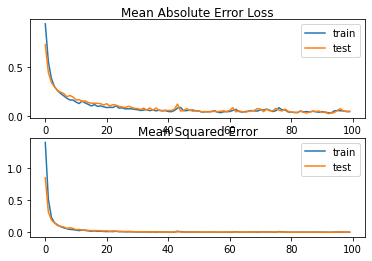

In [9]:
# plot loss during training
pyplot.subplot(211)
pyplot.title('Mean Absolute Error Loss', pad=-20)
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()


# plot mse during training
pyplot.subplot(212)
pyplot.title('Mean Squared Error', pad=-20)
pyplot.plot(history.history['mse'], label='train')
pyplot.plot(history.history['val_mse'], label='test')
pyplot.legend()
pyplot.show()

In [ ]:
'''A line plot is also created showing the mean absolute error loss over the training epochs
for both the train (blue) and test (orange) sets (top), and a similar plot for the mean squared
error (bottom). In this case, we can see that MAE does converge but shows a bumpy course,
although the dynamics of MSE don't appear greatly affected. We know that the target variable
is a standard Gaussian with no large outliers, so MAE would not be a good fit in this case. It
might be more appropriate on this problem if we did not scale the target variable first.'''